Dataset Source:

[COVID19 Timeseries Dataset](https://www.kaggle.com/datasets/ankitaguha/covid19-timeseries)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install prophet

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import pandas as pd
from prophet import Prophet

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset_file_path = '/content/drive/MyDrive/CMPE255/Assignment-6/covid19_timeseries.csv'

In [11]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

In [12]:
# Ensure the column names are "ds" and "y"
data = data.rename(columns={'date_column_name': 'ds', 'target_column_name': 'y'})

## EDA

In [14]:
# Summary statistics
summary_stats = data.describe()

In [15]:
# Time Series Plot for global data
# Aggregating data by date for global trends
global_agg = data.groupby('Dates').sum()
global_agg

<ipython-input-15-50ec3b0d103a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_agg = data.groupby('Dates').sum()


,Lat,Long,Confirmed Cases,Death Cases,Recovered Cases
Dates,,,,,
2020-01-22,5603.86785,6403.971914,555,17,28.0
2020-01-23,5603.86785,6403.971914,654,18,30.0
2020-01-24,5603.86785,6403.971914,941,26,36.0
2020-01-25,5603.86785,6403.971914,1434,42,43.0
2020-01-26,5603.86785,6403.971914,2118,56,102.0
...,...,...,...,...,...
2020-10-25,5603.86785,6403.971914,42960467,1153729,0.0
2020-10-26,5603.86785,6403.971914,43498333,1159490,0.0
2020-10-27,5603.86785,6403.971914,43965280,1166892,0.0


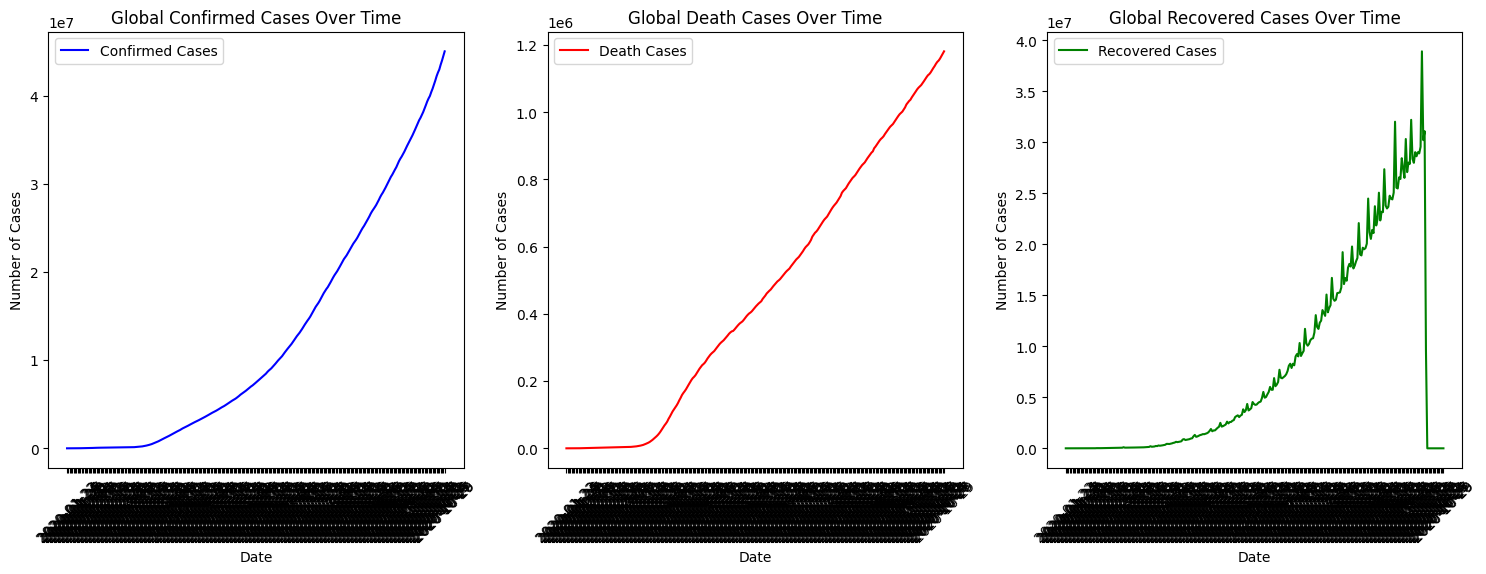

In [16]:
# Plotting global trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(global_agg.index, global_agg['Confirmed Cases'], label='Confirmed Cases', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['Death Cases'], label='Death Cases', color='red')
plt.title('Global Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(global_agg.index, global_agg['Recovered Cases'], label='Recovered Cases', color='green')
plt.title('Global Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

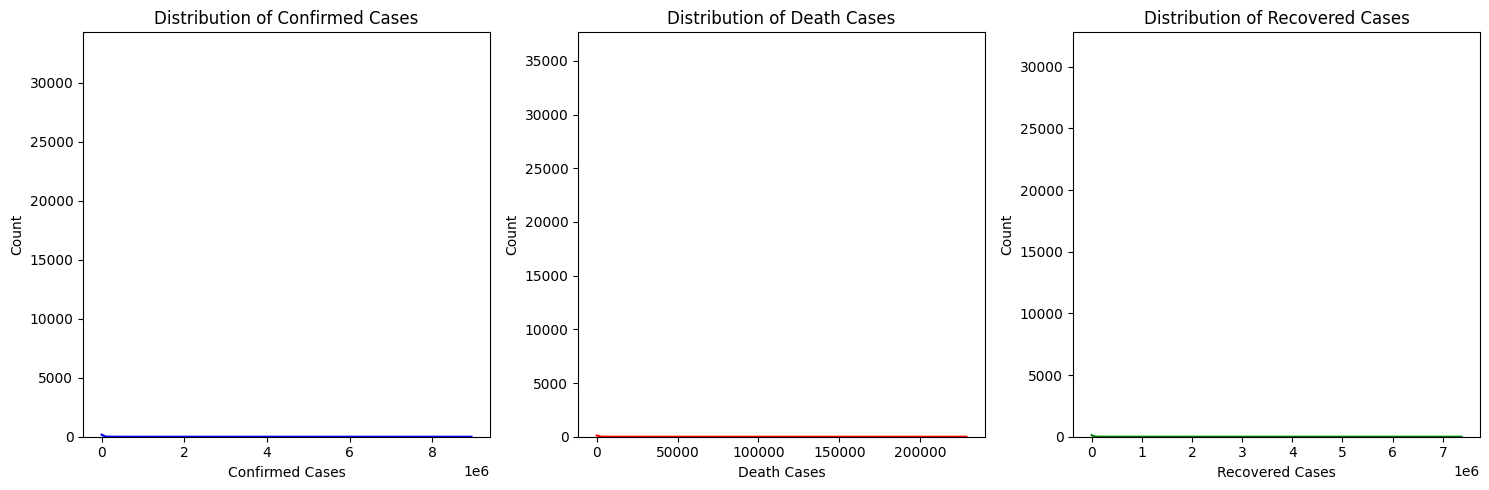

In [17]:
# Histograms for distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Confirmed Cases'], kde=True, color='blue')
plt.title('Distribution of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.histplot(data['Death Cases'], kde=True, color='red')
plt.title('Distribution of Death Cases')

plt.subplot(1, 3, 3)
sns.histplot(data['Recovered Cases'], kde=True, color='green')
plt.title('Distribution of Recovered Cases')

plt.tight_layout()
plt.show()

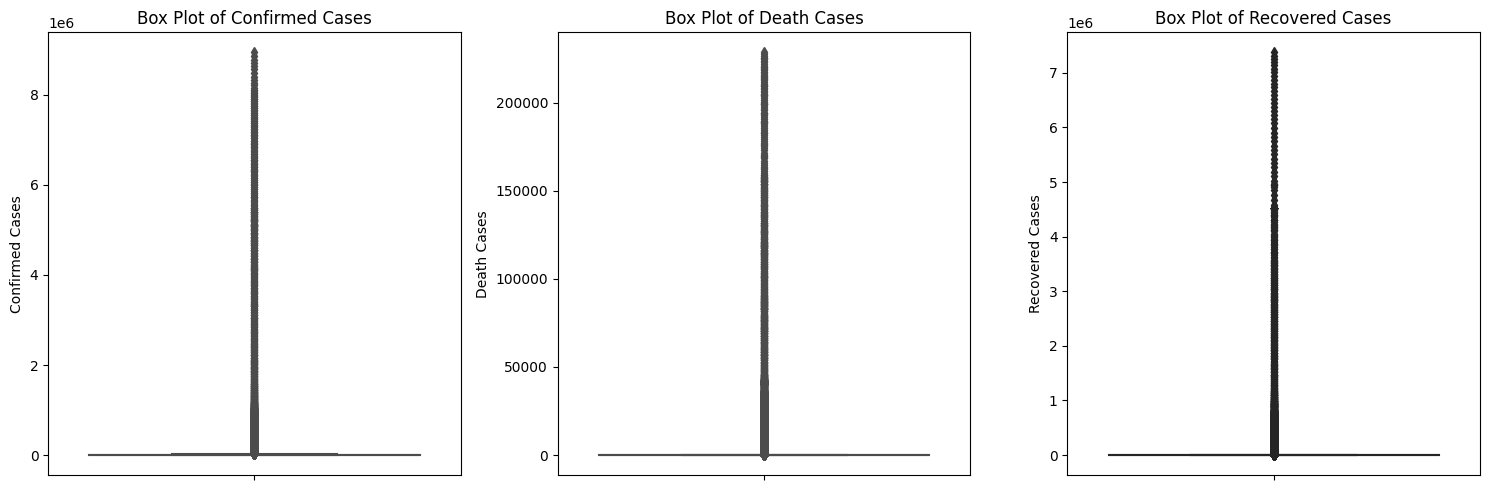

In [18]:
# Box plots for outlier detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='Confirmed Cases', color='blue')
plt.title('Box Plot of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='Death Cases', color='red')
plt.title('Box Plot of Death Cases')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='Recovered Cases', color='green')
plt.title('Box Plot of Recovered Cases')

plt.tight_layout()
plt.show()

In [19]:
# Extracting the unique list of countries from the dataset
countries = data['Country/Region'].unique()
countries.sort()
countries.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
data.head()

,Province/State,Country/Region,Lat,Long,Dates,Confirmed Cases,Death Cases,Recovered Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [21]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Dates',
       'Confirmed Cases', 'Death Cases', 'Recovered Cases'],
      dtype='object')

In [22]:
rows = data.shape[0]
cols = data.shape[1]
print(f"rows={rows}; columns={cols}")

rows=75576; columns=8


### Data Transformation

In [23]:
import pandas as pd

# Filter and rename columns for the US
us_data = data[data['Country/Region'] == 'US'][['Dates', 'Death Cases']]
us_data.rename(columns={'Dates': 'ds', 'Death Cases': 'y'}, inplace=True)
us_data['ds'] = pd.to_datetime(us_data['ds'])

In [24]:
# Summary statistics
summary_stats = us_data.describe()

In [25]:
# Time Series Plot for global data
# Aggregating data by date for global trends
global_agg = us_data.groupby('ds').sum()
global_agg

,y
ds,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-10-25,225233
2020-10-26,225710
2020-10-27,226696


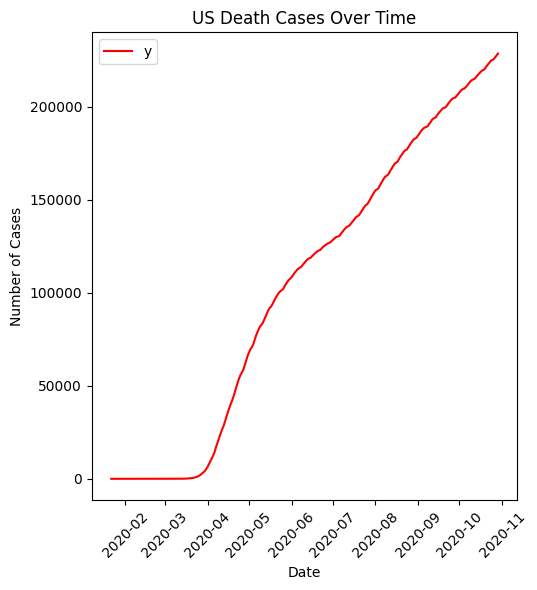

In [26]:
# Plotting global trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['y'], label='y', color='red')
plt.title('US Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

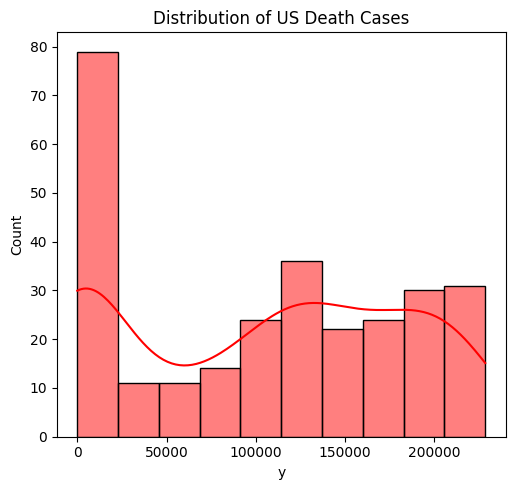

In [27]:
# Histograms for distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.histplot(us_data['y'], kde=True, color='red')
plt.title('Distribution of US Death Cases')

plt.tight_layout()
plt.show()

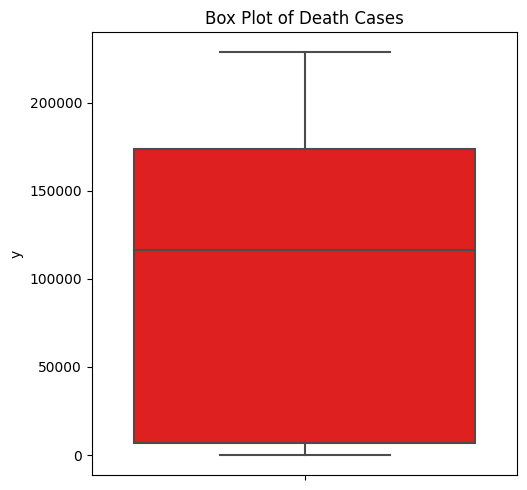

In [28]:
# Box plots for outlier detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.boxplot(data=us_data, y='y', color='red')
plt.title('Box Plot of Death Cases')

plt.tight_layout()
plt.show()

In [29]:
us_data

,ds,y
244,2020-01-22,0
512,2020-01-23,0
780,2020-01-24,0
1048,2020-01-25,0
1316,2020-01-26,0
...,...,...
74480,2020-10-25,225233
74748,2020-10-26,225710
75016,2020-10-27,226696
75284,2020-10-28,227685


In [30]:
us_data.head()

,ds,y
244,2020-01-22,0
512,2020-01-23,0
780,2020-01-24,0
1048,2020-01-25,0
1316,2020-01-26,0


In [31]:
us_data.describe()

,y
count,282.000000
mean,103677.507092
std,78516.538170
min,0.000000
25%,6797.500000
50%,116252.000000
75%,173961.250000
max,228656.000000


In [32]:
us_data.columns

Index(['ds', 'y'], dtype='object')

In [33]:
rows = us_data.shape[0]
cols = us_data.shape[1]
print(f"rows={rows}; columns={cols}")

rows=282; columns=2


## Modeling

In [34]:
model = Prophet()
model.fit(us_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xt_lmln/v7mca9bt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xt_lmln/h7sfu_x8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92216', 'data', 'file=/tmp/tmp2xt_lmln/v7mca9bt.json', 'init=/tmp/tmp2xt_lmln/h7sfu_x8.json', 'output', 'file=/tmp/tmp2xt_lmln/prophet_modely95b4b9h/prophet_model-20231127045117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
# Python
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
642,2021-10-25
643,2021-10-26
644,2021-10-27
645,2021-10-28
646,2021-10-29


In [36]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
642,2021-10-25,494865.764992,77274.473118,870297.259889
643,2021-10-26,495771.860597,75919.638237,872956.929705
644,2021-10-27,496746.382383,76000.505873,875973.658391
645,2021-10-28,497613.033819,75951.376709,878940.959398
646,2021-10-29,498462.155243,75193.569843,881423.894886


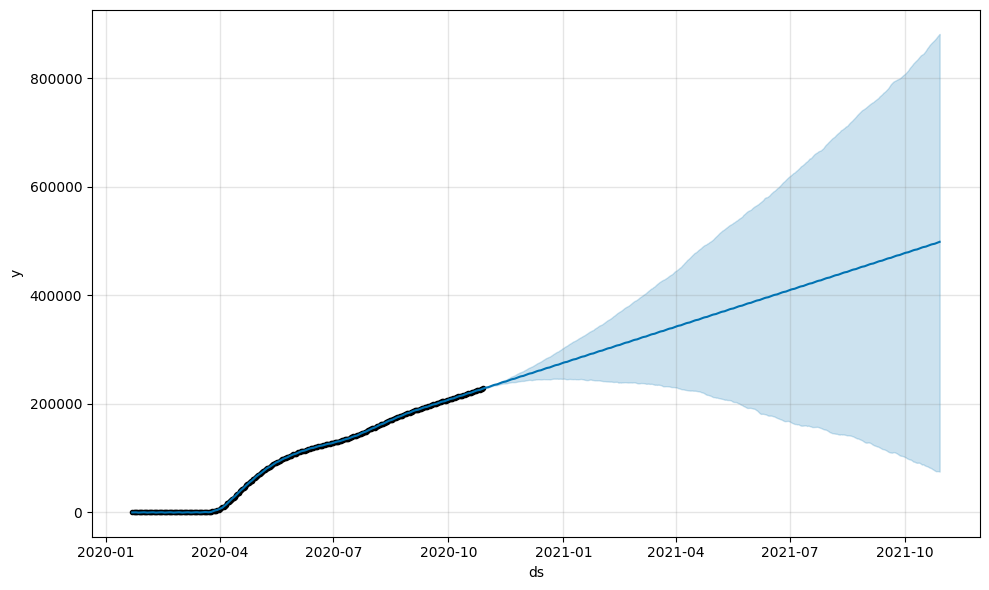

In [37]:
# Python
fig1 = model.plot(forecast)

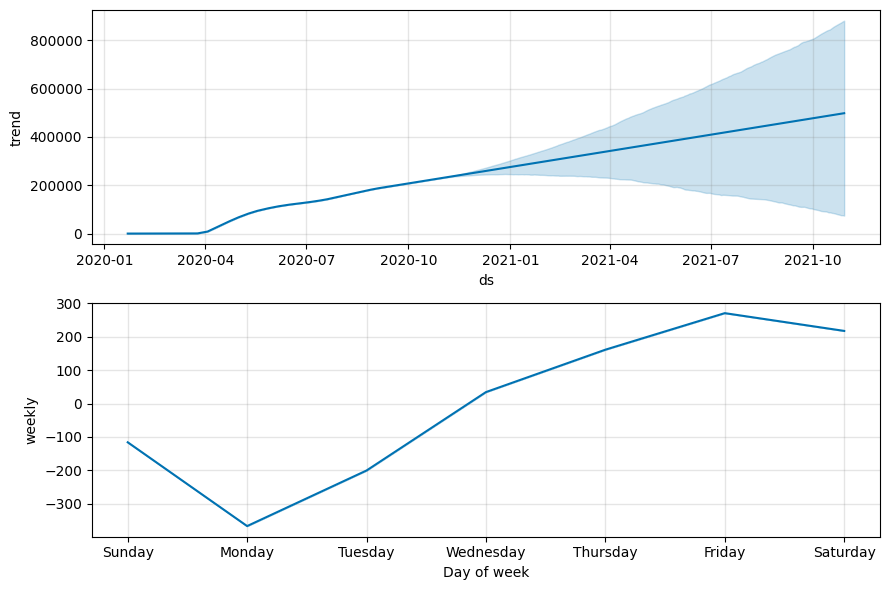

In [38]:
fig2 = model.plot_components(forecast)

In [39]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [40]:
plot_components_plotly(model, forecast)